# Predictive Modeling For Income Evaluation

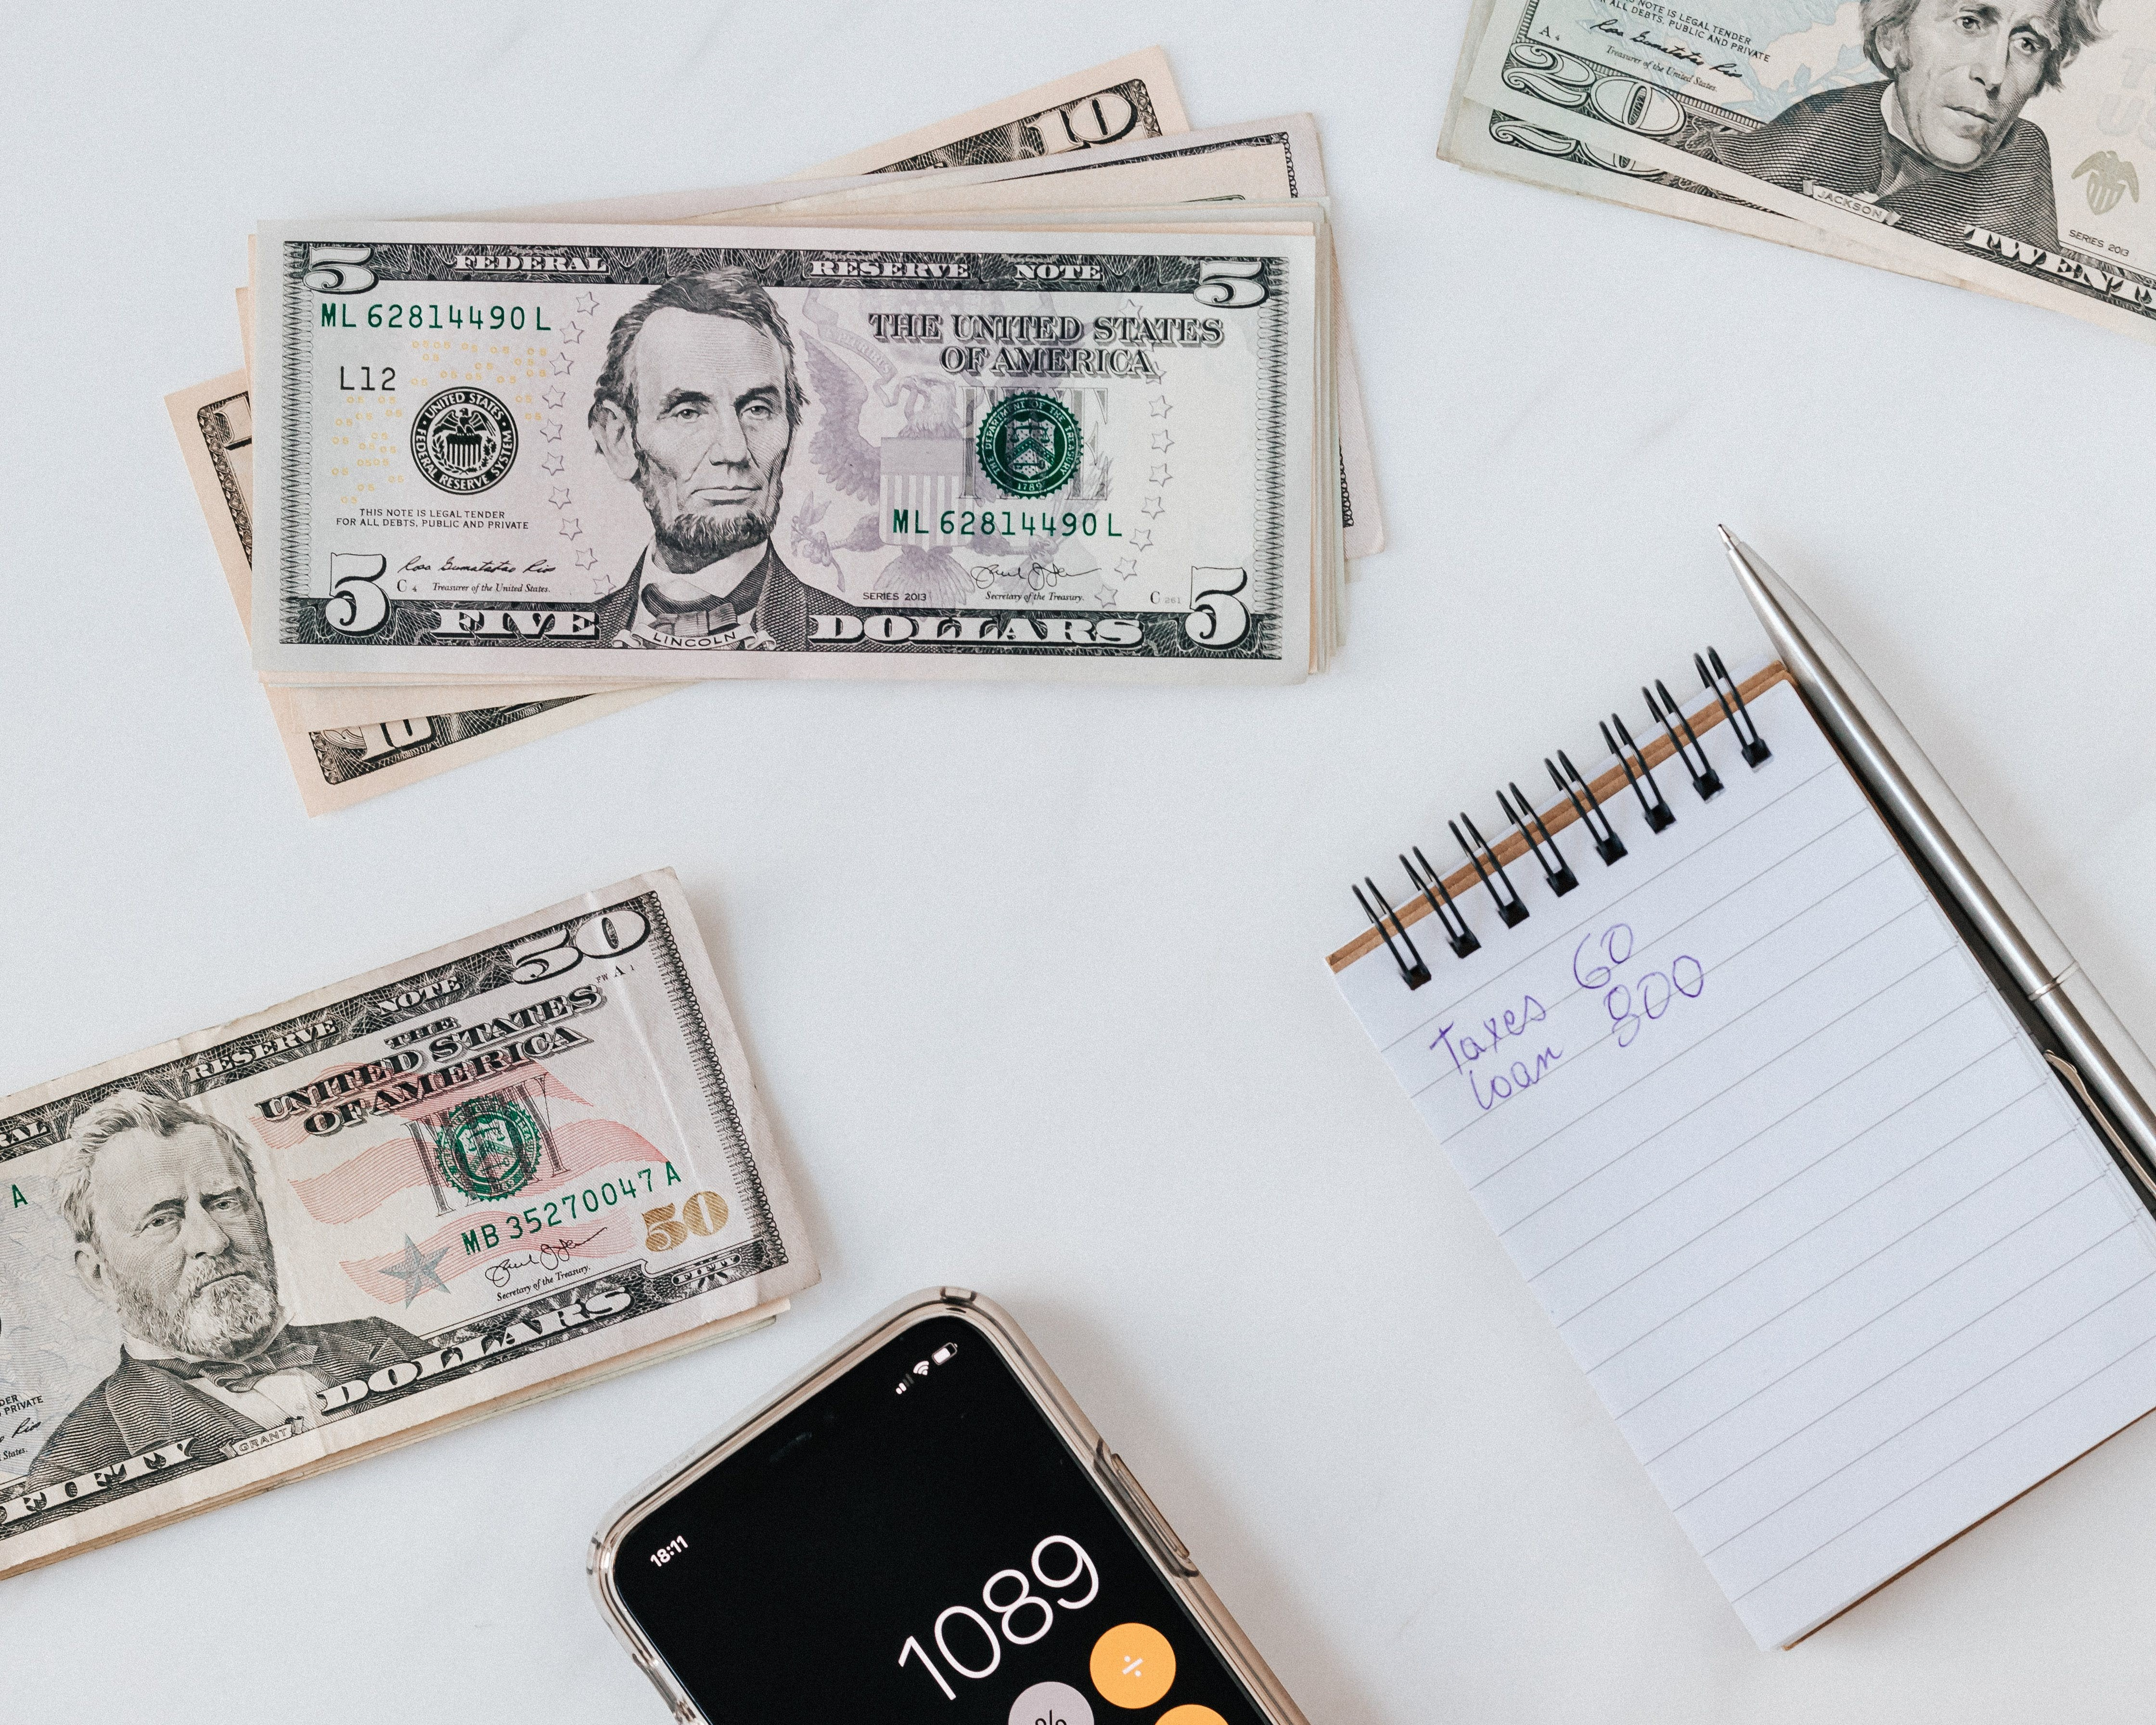

## Overview of the problem Statement: 

- We have information about people's income in different countries. Our goal is to use this information to build a model that can predict if someone earns more than 50k dollars or not. 

- By doing this, we want to figure out what factors are important for having a higher income. Understanding these factors can help us learn about the reasons some people make more money than others. This information is useful for people who make decisions about policies (rules or plans), researchers who study society, and anyone curious about what makes people financially successful in different parts of the world.

- This project has the potential to give us insights into how things like where you live, your job, and other factors might affect how much money you make. These insights can be valuable for making informed decisions about policies and understanding the reasons behind financial success in different places and for different groups of people.

## Objective:
- To predict the income of the Census by uncovering Socio-Economic Dynamics and People Characteristics.
- It’s a classification Problem

## Steps included in this project:
1. Importing Libraries
2. Dataset Overview
3. Exploratory Data Analysis & Visualization
4. Data Preprocessing & Feature Engineering
5. Model Building
6. Results
7. Insights

# 1. Importing Libraries

In [1]:
import os 
import numpy as np # linear algebra
import pandas as pd # data processing

# control and manage warnings
import warnings
warnings.filterwarnings('ignore')

# Data visualization setup
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid") # Set the style of seaborn

# 2. Dataset Overview

In [2]:
# Load the dataset from "Data_inc.csv" into a Pandas DataFrame
df = pd.read_csv("Data_inc.csv")
df.head()

Age   Profession Class  Final_census   Education   Education-num  \
0   39          State-gov         77516   Bachelors              13   
1   50   Self-emp-not-inc         83311   Bachelors              13   
2   38            Private        215646     HS-grad               9   
3   53            Private        234721        11th               7   
4   28            Private        338409   Bachelors              13   

        marital-status          occupation    relationship    race   Gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week         country  income  \
0           2174              0               40   United-States   <=50K   
1              0              0               13   United-States   <=50K   
2              0              0               40   United-States   <=50K   
3              0              0               40   United-States   <=50K   
4              0              0               40            Cuba   <=50K   

   Unnamed: 15  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [3]:
# Display the shape of the dataset
df.shape

(32561, 16)

In [4]:
# Display information about the dataset including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  32561 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       32561 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          32561 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

In [5]:
# Statistical description of numerical variables of the dataset
df.describe()

Age  Final_census   Education-num   capital-gain  \
count  32561.000000  3.256100e+04    32561.000000   32561.000000   
mean      38.581647  1.897784e+05       10.080679    1077.648844   
std       13.640433  1.055500e+05        2.572720    7385.292085   
min       17.000000  1.228500e+04        1.000000       0.000000   
25%       28.000000  1.178270e+05        9.000000       0.000000   
50%       37.000000  1.783560e+05       10.000000       0.000000   
75%       48.000000  2.370510e+05       12.000000       0.000000   
max       90.000000  1.484705e+06       16.000000   99999.000000   

        capital-loss   hours-per-week  Unnamed: 15  
count   32561.000000     32561.000000          2.0  
mean       87.303830        40.437456      55000.0  
std       402.960219        12.347429          0.0  
min         0.000000         1.000000      55000.0  
25%         0.000000        40.000000      55000.0  
50%         0.000000        40.000000      55000.0  
75%         0.000000        45.000000      55000.0  
max      4356.000000        99.000000      55000.0

### Columns in the Dataset:
- **Age:** The age of the individuals.
- **Profession Class:** The class or category of the profession.
- **Final Census:** A numerical value related to the final census.
- **Education:** The level of education attained.
- **Education-num:** The numerical representation of education.
- **Marital Status:** The marital status of the individuals.
- **Occupation:** The type of job or occupation.
- **Relationship:** The relationship status of the individuals.
- **Race:** The racial background of the individuals.
- **Gender:** The gender of the individuals.
- **Capital Gain:** Amount gained through investments or capital.
- **Capital Loss:** Amount lost through investments or capital.
- **Hours-per-week:** The number of hours worked per week.
- **Country:** The country of residence.
- **Income:** The target variable indicating whether the income exceeds $50,000.
- **Unnamed:15:** It has only 2 values so No Significance

In [6]:
# The column "Unnamed: 15" has only 2 values. So, dropping it
df.drop("Unnamed: 15", axis=1, inplace=True)
df.head() #Display the 1st five rows of the DataFrame

Age   Profession Class  Final_census   Education   Education-num  \
0   39          State-gov         77516   Bachelors              13   
1   50   Self-emp-not-inc         83311   Bachelors              13   
2   38            Private        215646     HS-grad               9   
3   53            Private        234721        11th               7   
4   28            Private        338409   Bachelors              13   

        marital-status          occupation    relationship    race   Gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week         country  income  
0           2174              0               40   United-States   <=50K  
1              0              0               13   United-States   <=50K  
2              0              0               40   United-States   <=50K  
3              0              0               40   United-States   <=50K  
4              0              0               40            Cuba   <=50K

In [7]:
# Display the shape of the dataset
df.shape

(32561, 15)

In [8]:
# Display information about the dataset including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3    Education        32561 non-null  object
 4    Education-num    32561 non-null  int64 
 5    marital-status   32561 non-null  object
 6    occupation       32561 non-null  object
 7    relationship     32561 non-null  object
 8    race             32561 non-null  object
 9   Gender            32561 non-null  object
 10   capital-gain     32561 non-null  int64 
 11   capital-loss     32561 non-null  int64 
 12   hours-per-week   32561 non-null  int64 
 13   country          32561 non-null  object
 14   income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- **Numeric columns are correctly typed as int.**
- **But the column names are not properlyspaced and named.**

In [9]:
# Renaming columns properly

df.rename({'Profession Class':'Profession_Class', ' Education':'Education', ' Education-num':'Education_num', ' marital-status':'Marital_status',
           ' occupation':'Occupation', ' relationship':'Relationship', ' race':'Race', ' capital-gain':'Capital_gain',
           ' capital-loss':'Capital_loss', ' hours-per-week':'Hours_per_week', ' country':'Country',' income':'Income'}, 
           axis=1, inplace=True)

In [10]:
#Display the DataFrame
df.head() 

Age   Profession_Class  Final_census   Education  Education_num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        Marital_status          Occupation    Relationship    Race   Gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital_gain  Capital_loss  Hours_per_week         Country  Income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [11]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession_Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education_num     32561 non-null  int64 
 5   Marital_status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Gender            32561 non-null  object
 10  Capital_gain      32561 non-null  int64 
 11  Capital_loss      32561 non-null  int64 
 12  Hours_per_week    32561 non-null  int64 
 13  Country           32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Duplicates

In [12]:
# Counting the number of duplicated rows
df.duplicated().sum()

24

In [13]:
# Displaying the duplicated rows 
df[df.duplicated()]

Age   Profession_Class  Final_census      Education  Education_num  \
4881    25            Private        308144      Bachelors             13   
5104    90            Private         52386   Some-college             10   
9171    21            Private        250051   Some-college             10   
11631   20            Private        107658   Some-college             10   
13084   25            Private        195994        1st-4th              2   
15059   21            Private        243368      Preschool              1   
17040   46            Private        173243        HS-grad              9   
18555   30            Private        144593        HS-grad              9   
18698   19            Private         97261        HS-grad              9   
21318   19            Private        138153   Some-college             10   
21490   19            Private        146679   Some-college             10   
21875   49            Private         31267        7th-8th              4   
22300   25            Private        195994        1st-4th              2   
22367   44            Private        367749      Bachelors             13   
22494   49   Self-emp-not-inc         43479   Some-college             10   
25872   23            Private        240137        5th-6th              3   
26313   28            Private        274679        Masters             14   
28230   27            Private        255582        HS-grad              9   
28522   42            Private        204235   Some-college             10   
28846   39            Private         30916        HS-grad              9   
29157   38            Private        207202        HS-grad              9   
30845   46            Private        133616   Some-college             10   
31993   19            Private        251579   Some-college             10   
32404   35            Private        379959        HS-grad              9   

            Marital_status          Occupation    Relationship  \
4881         Never-married        Craft-repair   Not-in-family   
5104         Never-married       Other-service   Not-in-family   
9171         Never-married      Prof-specialty       Own-child   
11631        Never-married        Tech-support   Not-in-family   
13084        Never-married     Priv-house-serv   Not-in-family   
15059        Never-married     Farming-fishing   Not-in-family   
17040   Married-civ-spouse        Craft-repair         Husband   
18555        Never-married       Other-service   Not-in-family   
18698        Never-married     Farming-fishing   Not-in-family   
21318        Never-married        Adm-clerical       Own-child   
21490        Never-married     Exec-managerial       Own-child   
21875   Married-civ-spouse        Craft-repair         Husband   
22300        Never-married     Priv-house-serv   Not-in-family   
22367        Never-married      Prof-specialty   Not-in-family   
22494   Married-civ-spouse        Craft-repair         Husband   
25872        Never-married   Handlers-cleaners   Not-in-family   
26313        Never-married      Prof-specialty   Not-in-family   
28230        Never-married   Machine-op-inspct   Not-in-family   
28522   Married-civ-spouse      Prof-specialty         Husband   
28846   Married-civ-spouse        Craft-repair         Husband   
29157   Married-civ-spouse   Machine-op-inspct         Husband   
30845             Divorced        Adm-clerical       Unmarried   
31993        Never-married       Other-service       Own-child   
32404             Divorced       Other-service   Not-in-family   

                      Race   Gender  Capital_gain  Capital_loss  \
4881                 White     Male             0             0   
5104    Asian-Pac-Islander     Male             0             0   
9171                 White   Female             0             0   
11631                White   Female             0             0   
13084                White   Female             0             0   
15059                White  

In [14]:
# Extracting the indices of the duplicated rows
duplicated_index=df[df.duplicated()].index

In [15]:
# Getting the shape (number of elements) of the duplicated row
duplicated_index.shape

(24,)

In [16]:
# Display index of duplicated row
duplicated_index

Int64Index([ 4881,  5104,  9171, 11631, 13084, 15059, 17040, 18555, 18698,
            21318, 21490, 21875, 22300, 22367, 22494, 25872, 26313, 28230,
            28522, 28846, 29157, 30845, 31993, 32404],
           dtype='int64')

In [17]:
#dropping duplicate values
df.drop(duplicated_index,axis=0,inplace=True) 

In [18]:
df.shape

(32537, 15)

In [19]:
df.duplicated().sum()

0

In [20]:
# Statistical description of numerical variables of the dataset
df.describe()

Age  Final_census  Education_num  Capital_gain  Capital_loss  \
count  32537.000000  3.253700e+04   32537.000000  32537.000000  32537.000000   
mean      38.585549  1.897808e+05      10.081815   1078.443741     87.368227   
std       13.637984  1.055565e+05       2.571633   7387.957424    403.101833   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369930e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32537.000000  
mean        40.440329  
std         12.346889  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

# 3. Exploratory Data Analysis & Visualization

### Income(Target Variable)

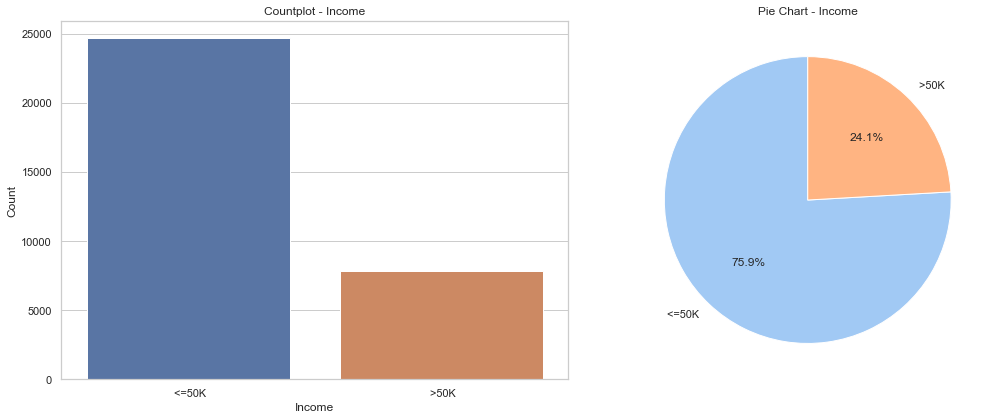

In [21]:
# Plotting countplot and pie chart for 'Income'
plt.figure(figsize=(15, 6))

# Countplot
plt.subplot(1, 2, 1)
sns.countplot(x='Income', data=df, palette='deep')
plt.title('Countplot - Income')
plt.xlabel('Income')
plt.ylabel('Count')

# Pie chart
plt.subplot(1, 2, 2)
Income_counts = df['Income'].value_counts()
labels = Income_counts.index
colors = sns.color_palette('pastel')
plt.pie(Income_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart - Income')

plt.tight_layout()
plt.show()

In [22]:
# Print the counts
print("Number of rows with income <= 50K:", Income_counts[' <=50K'])
print("Number of rows with income > 50K:", Income_counts[' >50K'])

Number of rows with income <= 50K: 24698
Number of rows with income > 50K: 7839


- The "Income" column is our target variable which has two values "<= 50K and > 50K" 
- Number of rows with income <= 50K is 24698 and Number of rows with income > 50K is 7839
- The people with income higher than 50K are significantly less.
- The dataset is imbalanced.

### Age 

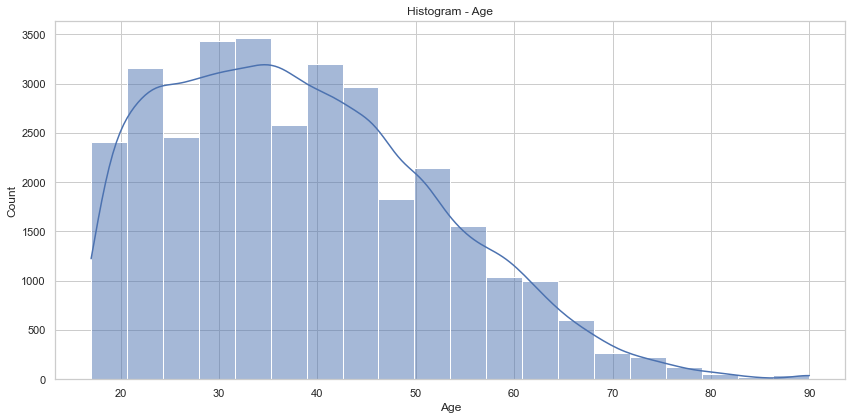

In [23]:
plt.figure(figsize=(12, 6))

# Histogram
sns.histplot(x='Age', data=df, bins=20, kde=True, palette='bright')
plt.title('Histogram - Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

- We observe that our data is has right skewness, with majority of the Ages falling in the 20–50. 
- The count keeps on decreasing as the Age increases.
- We do not have any null values in the Age column.

### Profession_Class

In [24]:
# Displaying the count of each unique value in the "Profession_Class" column.
df["Profession_Class"].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Profession_Class, dtype: int64

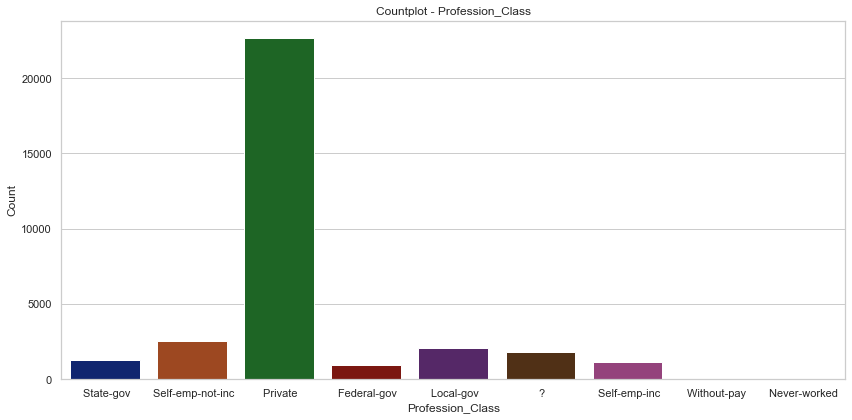

In [25]:
plt.figure(figsize=(12, 6))

# Countplot
sns.countplot(x='Profession_Class', data=df, palette='dark')
plt.title('Countplot - Profession_Class')
plt.xlabel('Profession_Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

- We observe that majority of the people belong to ‘Private’ sector Profession_Class.
- The missing values of Profession_Class are 1836 and values represented by ‘?’ 

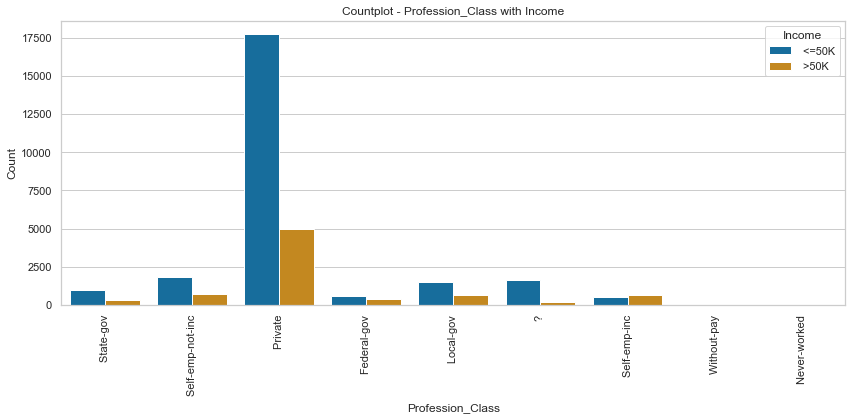

In [26]:
plt.figure(figsize=(12, 6))

# Countplot with 'Income' 

sns.countplot(x='Profession_Class', data=df, hue='Income', palette='colorblind')
plt.title('Countplot - Profession_Class with Income')
plt.xlabel('Profession_Class')
plt.ylabel('Count')
plt.xticks(rotation=90) #Adjust the rotation angle

plt.tight_layout()
plt.show()

- **Ratio of people earning more than 50K is higher in case Profession_Class is ‘Self-emp-inc’**

### Education

In [27]:
df["Education"].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

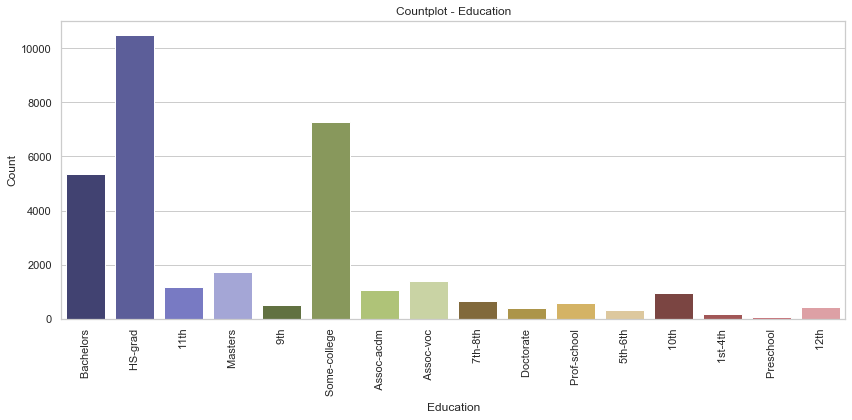

In [28]:
plt.figure(figsize=(12, 6))

# Countplot
sns.countplot(x='Education', data=df, palette='tab20b')
plt.title('Countplot - Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=90) #Adjust the rotation angle

plt.tight_layout()
plt.show()

- The ‘Education’ column has 16 different categories available. 
- Majority of the people have education level as ‘HS-grad’, followed by ‘Some-college’ and ‘Bachelors’.

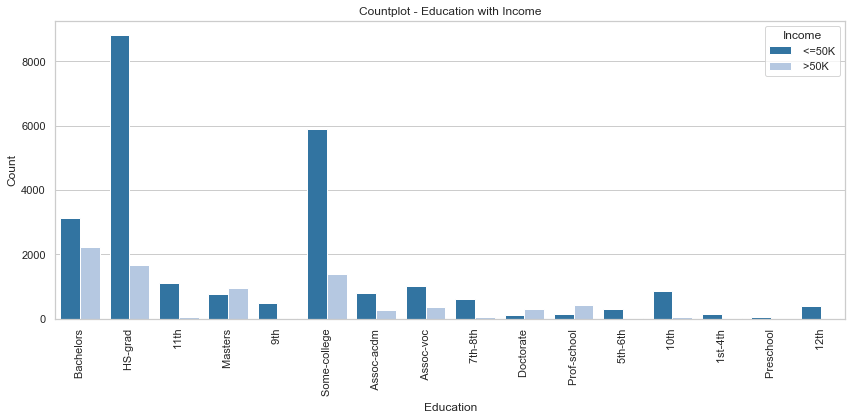

In [29]:
plt.figure(figsize=(12, 6))

# Countplot with 'Income' 
sns.countplot(x='Education', data=df, hue='Income', palette='tab20')
plt.title('Countplot - Education with Income')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=90) #Adjust the rotation angle

plt.tight_layout()
plt.show()

- **People with education level as ‘Masters/Doctorate/Prof-school’ have higher ratios of >50K earning, than <=50K.**

### Education_num

In [30]:
# Group by 'Education' and 'Education_num' and count occurrences
education_counts = df.groupby(['Education', 'Education_num']).size().reset_index(name='Count')
education_counts

Education  Education_num  Count
0            10th              6    933
1            11th              7   1175
2            12th              8    433
3         1st-4th              2    166
4         5th-6th              3    332
5         7th-8th              4    645
6             9th              5    514
7      Assoc-acdm             12   1067
8       Assoc-voc             11   1382
9       Bachelors             13   5353
10      Doctorate             16    413
11        HS-grad              9  10494
12        Masters             14   1722
13      Preschool              1     50
14    Prof-school             15    576
15   Some-college             10   7282

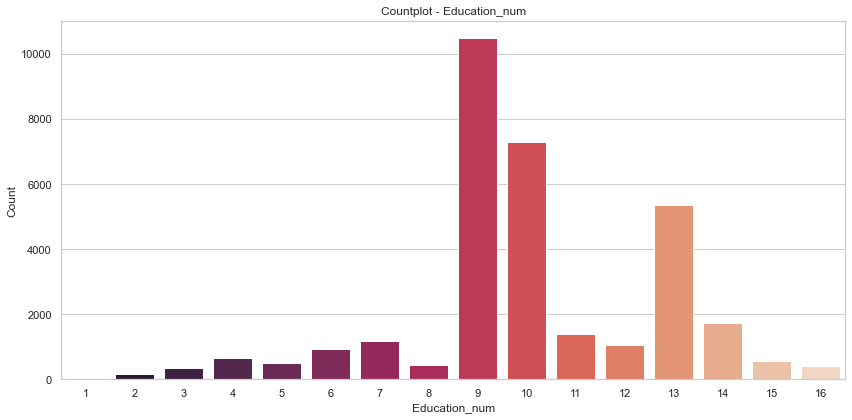

In [31]:
plt.figure(figsize=(12, 6))

# Countplot
sns.countplot(x='Education_num', data=df, palette='rocket')
plt.title('Countplot - Education_num')
plt.xlabel('Education_num')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

- The count of ‘Education’ column and ‘Education_num’ is exactly same. Which means, the ‘Education_num’ column is providing same information as ‘Education’ column, but in a numeric manner.

### Marital_status

In [32]:
df["Marital_status"].value_counts()

 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

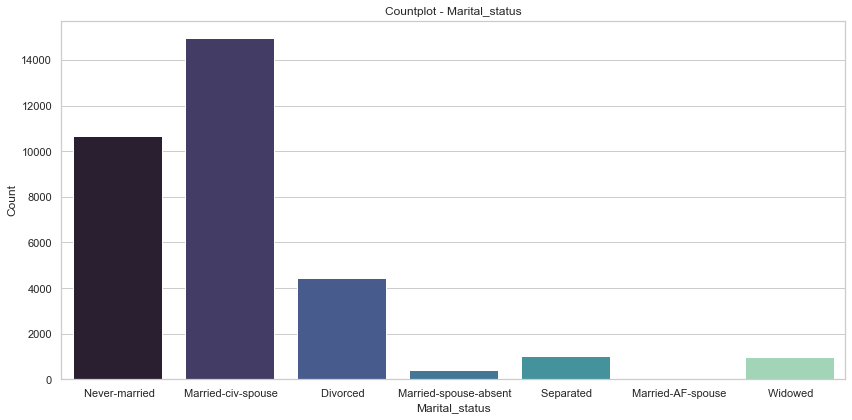

In [33]:
plt.figure(figsize=(12, 6))

# Countplot
sns.countplot(x='Marital_status', data=df, palette='mako')
plt.title('Countplot - Marital_status')
plt.xlabel('Marital_status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

- Majority of the people have ‘Marital_Status’ as ‘Married-civ-spouse’, and least have ‘Married-AF-spouse’.
- Count of ‘Never-married’ is also quite high.

### Occupation

In [34]:
df["Occupation"].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

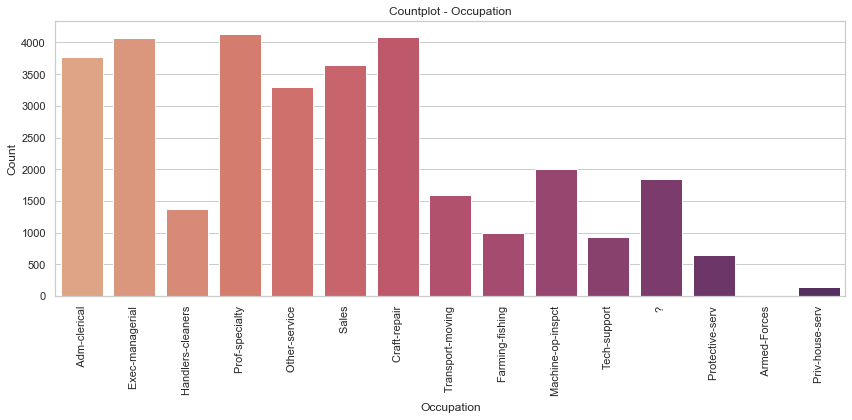

In [35]:
plt.figure(figsize=(12, 6))

# Countplot
sns.countplot(x='Occupation', data=df, palette='flare')
plt.title('Countplot - Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90) #Adjust the rotation angle

plt.tight_layout()
plt.show()

- The missing values of Occupation are 1843 and values represented by ‘?’ 

### Relationship

In [36]:
df["Relationship"].value_counts()

 Husband           13187
 Not-in-family      8292
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

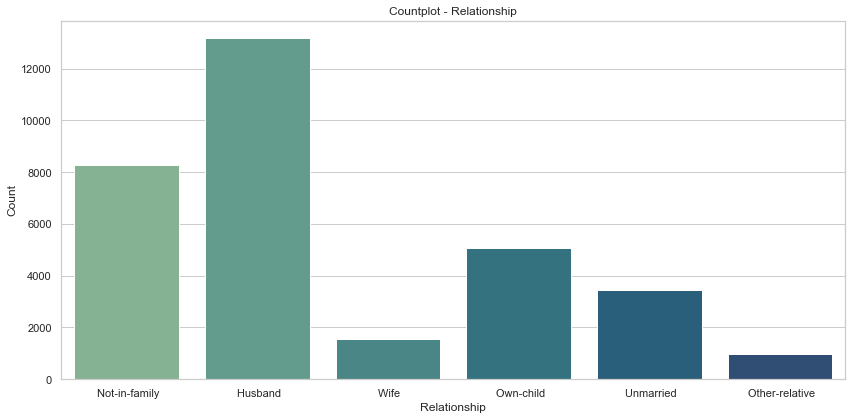

In [37]:
plt.figure(figsize=(12, 6))

# Countplot
sns.countplot(x='Relationship', data=df, palette='crest')
plt.title('Countplot - Relationship')
plt.xlabel('Relationship')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

- Here, we can see the highest number for ‘Husband’ and lowest for ‘Other-relative’.

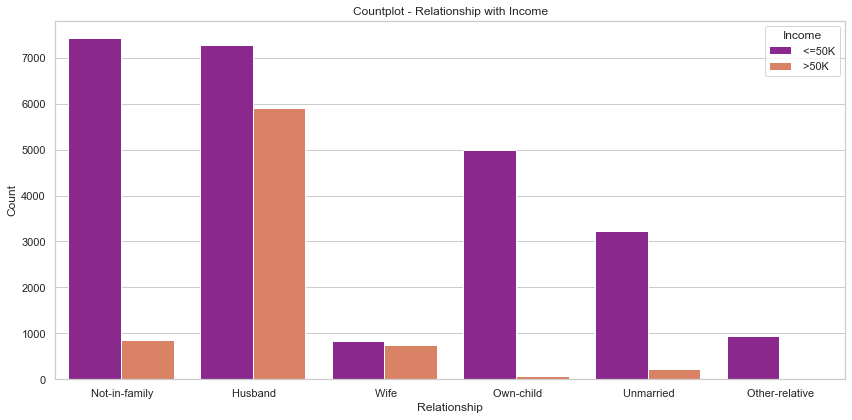

In [38]:
plt.figure(figsize=(12, 6))

# Countplot with 'Income' 
sns.countplot(x='Relationship', data=df, hue='Income', palette='plasma')
plt.title('Countplot - Relationship with Income')
plt.xlabel('Relationship')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

- **If the relationship in family is either ‘Husband/Wife’, the chances of earning more than 50K is high.**

### Race

In [39]:
df["Race"].value_counts()

 White                 27795
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

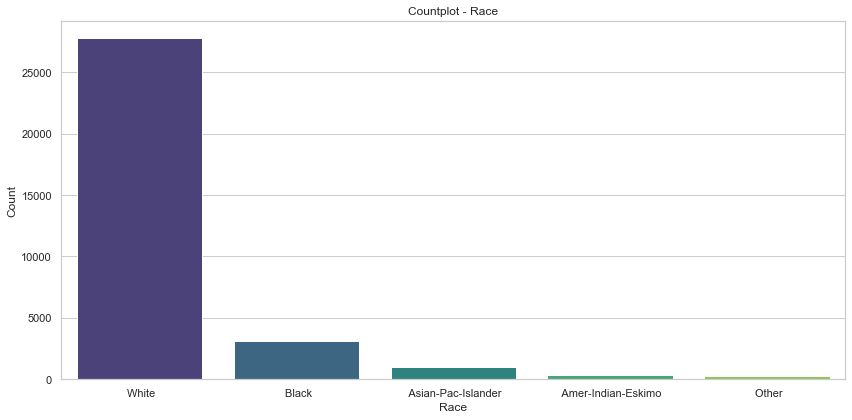

In [40]:
plt.figure(figsize=(12, 6))

# Countplot
sns.countplot(x='Race', data=df, palette='viridis')
plt.title('Countplot - Race')
plt.xlabel('Race')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

- Highest number of people have race as ‘White’

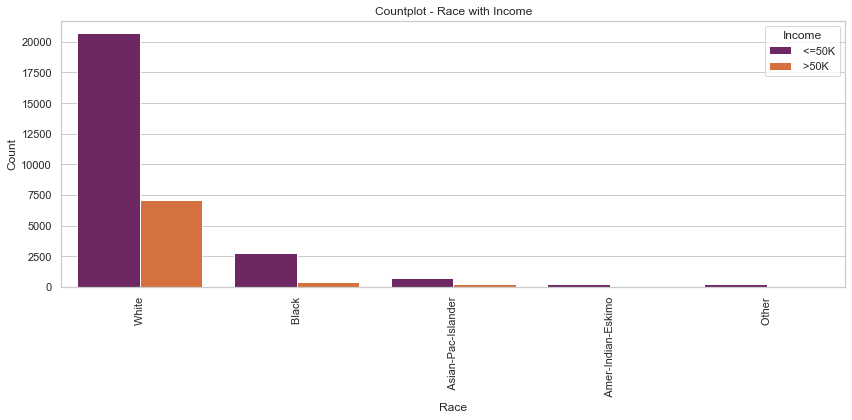

In [41]:
plt.figure(figsize=(12, 6))

# Countplot with 'Income' 
sns.countplot(x='Race', data=df, hue='Income', palette='inferno')
plt.title('Countplot - Race with Income')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=90) #Adjust the rotation angle

plt.tight_layout()
plt.show()

- **A person has high chance of earning >50K in case his/her race is ‘White’.**

### Gender

In [42]:
df["Gender"].value_counts()

 Male      21775
 Female    10762
Name: Gender, dtype: int64

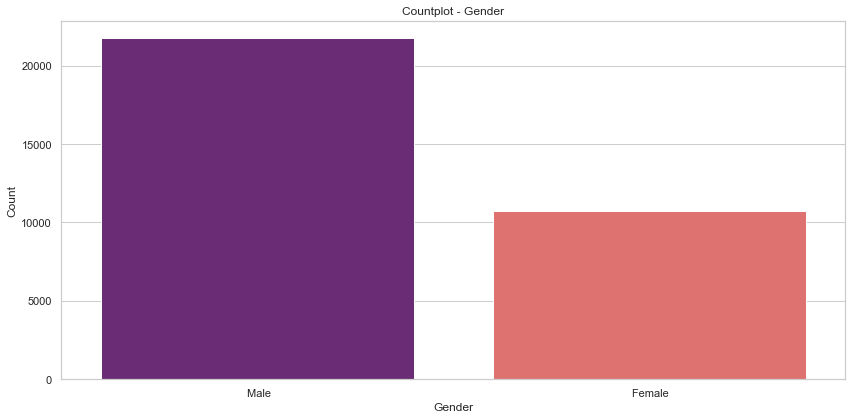

In [43]:
plt.figure(figsize=(12, 6))

# Countplot
sns.countplot(x='Gender', data=df, palette='magma')
plt.title('Countplot - Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

- Number of males are almost double to number of females.

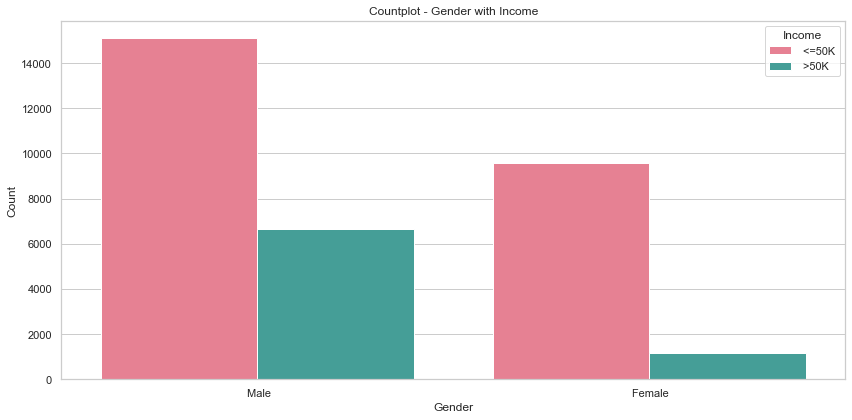

In [44]:
plt.figure(figsize=(12, 6))

# Countplot with 'Income' 
sns.countplot(x='Gender', data=df, hue='Income', palette='husl')
plt.title('Countplot - Gender with Income')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

- **Males have a higher chance of earning more than 50K, than females.**

### Capital_gain

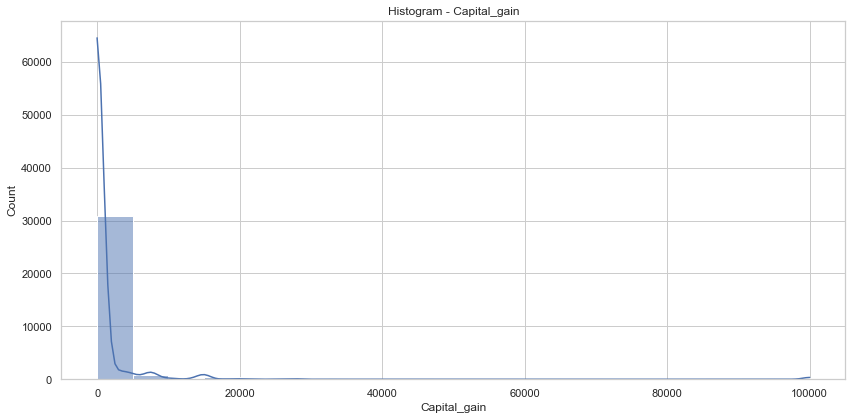

In [45]:
plt.figure(figsize=(12, 6))

# Histogram
sns.histplot(x='Capital_gain', data=df, bins=20, kde=True, palette='cividis')
plt.title('Histogram - Capital_gain')
plt.xlabel('Capital_gain')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

- Majority of the values set as 0. 
- The distribution plot for ‘Capital_gain’ column is highly right skewed.

### Capital_loss

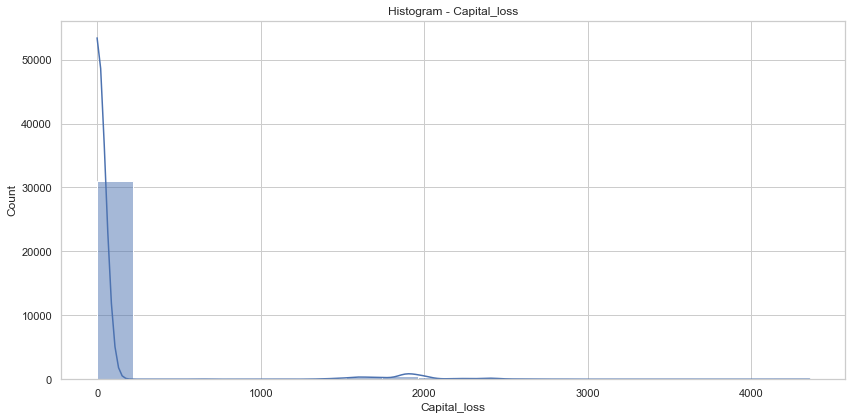

In [46]:
plt.figure(figsize=(12, 6))

# Histogram
sns.histplot(x='Capital_loss', data=df, bins=20, kde=True, palette='cividis')
plt.title('Histogram - Capital_loss')
plt.xlabel('Capital_loss')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

- Majority of the values set as 0. 
- The distribution plot for ‘Capital_loss’ column is highly right skewed.

### Hours_per_week

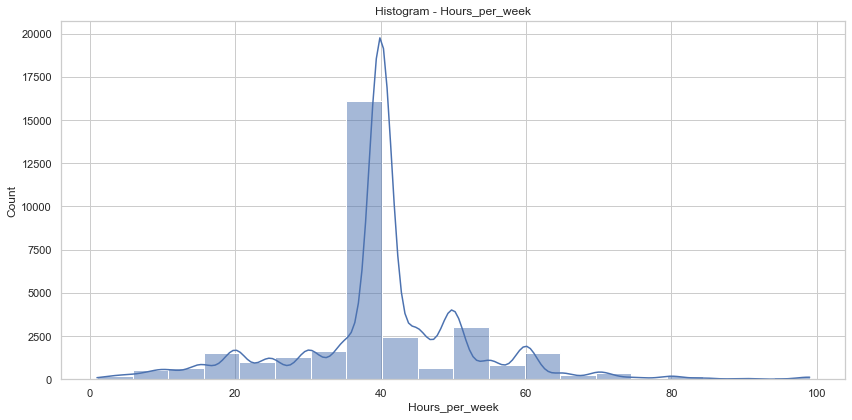

In [47]:
plt.figure(figsize=(12, 6))

# Histogram
sns.histplot(x='Hours_per_week', data=df, bins=20, kde=True, palette='vlag')
plt.title('Histogram - Hours_per_week')
plt.xlabel('Hours_per_week')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

- Majority of the values have data near 40 hours.

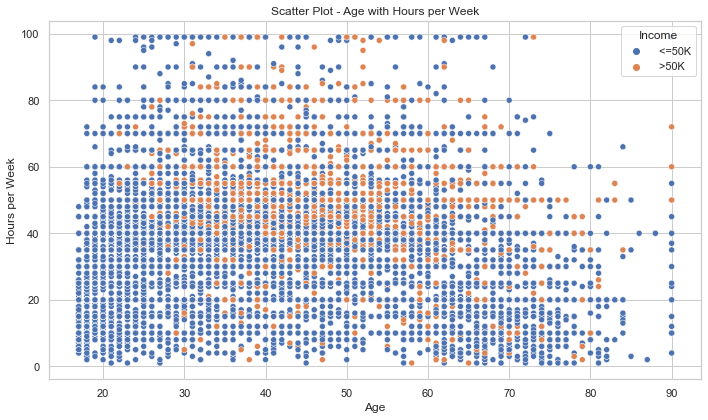

In [48]:
plt.figure(figsize=(10, 6))

# Scatter plot for Age and Hours_per_week with 'Income'
sns.scatterplot(x='Age', y='Hours_per_week', hue='Income', data=df)
plt.title('Scatter Plot - Age with Hours per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')

plt.tight_layout()
plt.show()

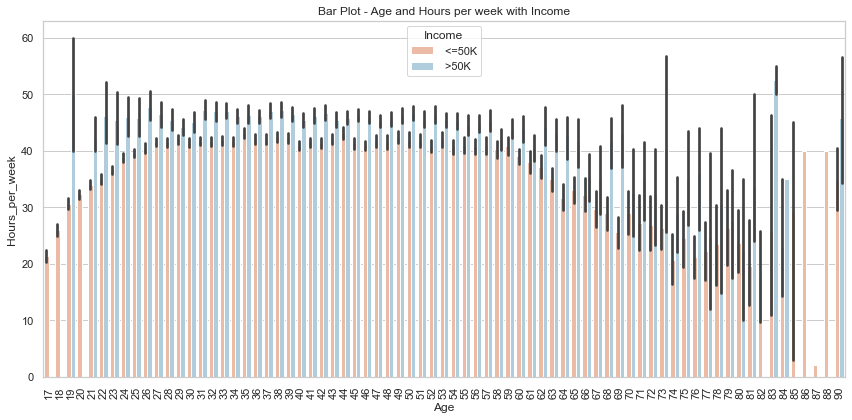

In [49]:
plt.figure(figsize=(12, 6))

# Bar plot for Age and Hours_per_week with 'Income'
sns.barplot(x='Age', y='Hours_per_week', hue='Income', data=df, palette='RdBu')
plt.title('Bar Plot - Age and Hours per week with Income')
plt.xlabel('Age')
plt.ylabel('Hours_per_week')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

- We can see from the above Scatter Plot, a person needs to be >30 to be earning more than 50K, else needs to work at least 60 hours_per_week to earn >50K.

### Country

In [50]:
df["Country"].value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        62
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

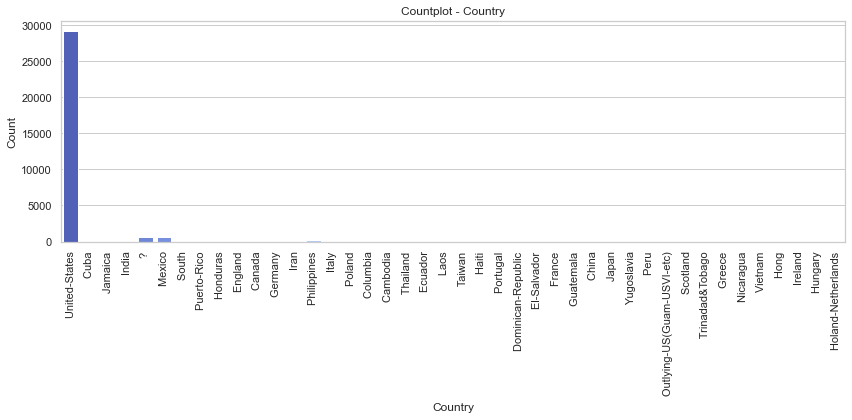

In [51]:
plt.figure(figsize=(12, 6))

# Countplot
sns.countplot(x='Country', data=df, palette='coolwarm')
plt.title('Countplot - Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90) #Adjust the rotation angle

plt.tight_layout()
plt.show()

- Highest count set to ‘United-States’, and rest of the rows contain quite few numbers.
- The missing values of Occupation are 582 and values represented by ‘?’ 

### Final Census

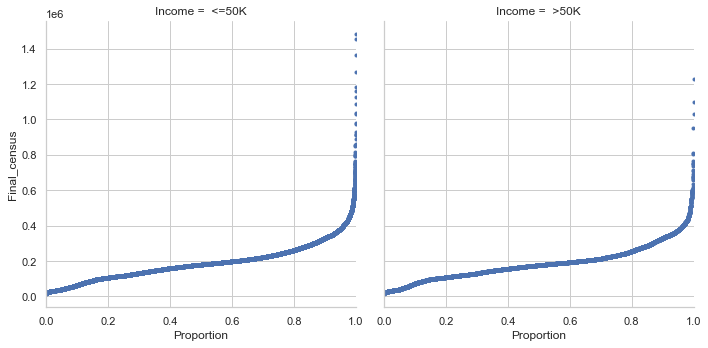

In [52]:
sns.displot(data=df,y='Final_census',col='Income',kind='ecdf',marker = '.', linestyle = 'none')
plt.show()

- Here we can see both the low and high income group have same distribution, so we will be dropping it.

# 4. Data Preprocessing & Feature Engineering

## Correlation(Heatmap)

In [53]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'Income' column
df['Income'] = label_encoder.fit_transform(df['Income'])

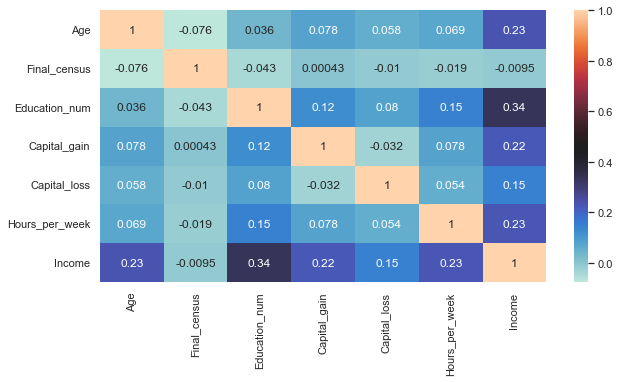

In [54]:
corr = df.corr()

plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True, cmap = 'icefire')
plt.show()

- Income has 34% correlation with ‘Education_num’, 23% correlation with ‘hours_per_week’ and ‘age’, and 22% correlation with ‘Capital_gain’. 
- So the correlations are moderate.

In [55]:
# Drop the column "Final_census"
df.drop("Final_census", axis=1, inplace=True)
df.head() 

Age   Profession_Class   Education  Education_num       Marital_status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           Occupation    Relationship    Race   Gender  Capital_gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   Capital_loss  Hours_per_week         Country  Income  
0             0              40   United-States       0  
1             0              13   United-States       0  
2             0              40   United-States       0  
3             0              40   United-States       0  
4             0              40            Cuba       0

## Hypothesis testing for testing relation between categorical variables

In [56]:
cat_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)
        
cat_col   

['Profession_Class',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Gender',
 'Country']

In [57]:
# For Categorical variables- Chi-square test of independence of variables in a contingency table.
from scipy.stats import chi2_contingency
chi2_test = []
for feature in df[cat_col]:
    if chi2_contingency(pd.crosstab(df['Income'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_col, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

Column       Hypothesis Result
0  Profession_Class  Reject Null Hypothesis
1         Education  Reject Null Hypothesis
2    Marital_status  Reject Null Hypothesis
3        Occupation  Reject Null Hypothesis
4      Relationship  Reject Null Hypothesis
5              Race  Reject Null Hypothesis
6            Gender  Reject Null Hypothesis
7           Country  Reject Null Hypothesis

## Missing Value Treatment

In [58]:
# Get unique values for each column
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

# Print unique values for each column
for column, values in unique_values.items():
    print(f"Unique values for {column}:\n{values}\n")

Unique values for Age:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values for Profession_Class:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values for Education:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values for Education_num:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for Marital_status:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique values for Occupation:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sal

- **We have rows "Profession_Class", "Occupation" and "Country" where we have '?' for null or unknown values.**
- **So we will replace it with "NAN" values.**

In [59]:
# Remove leading/trailing whitespaces in column names
df['Profession_Class'] = df['Profession_Class'].str.strip()
df['Education'] = df['Education'].str.strip()
df['Marital_status'] = df['Marital_status'].str.strip()
df['Occupation'] = df['Occupation'].str.strip()
df['Relationship'] = df['Relationship'].str.strip()
df['Race'] = df['Race'].str.strip()
df['Gender'] = df['Gender'].str.strip()
df['Country'] = df['Country'].str.strip()

In [60]:
# Get unique values for each column
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

# Print unique values for each column
for column, values in unique_values.items():
    print(f"Unique values for {column}:\n{values}\n")

Unique values for Age:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values for Profession_Class:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique values for Education:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Unique values for Education_num:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for Marital_status:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique values for Occupation:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'


In [61]:
# Replacing the with "NAN" values
df.replace('?', np.NaN, inplace=True)

In [62]:
# Checking for missing values in each column 
df.isnull().sum()

Age                    0
Profession_Class    1836
Education              0
Education_num          0
Marital_status         0
Occupation          1843
Relationship           0
Race                   0
Gender                 0
Capital_gain           0
Capital_loss           0
Hours_per_week         0
Country              582
Income                 0
dtype: int64

In [63]:
# Impute missing values with the mode

df['Profession_Class'] = df['Profession_Class'].fillna(df['Profession_Class'].mode()[0])
df['Occupation'] = df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])

In [64]:
df.isnull().sum()

Age                 0
Profession_Class    0
Education           0
Education_num       0
Marital_status      0
Occupation          0
Relationship        0
Race                0
Gender              0
Capital_gain        0
Capital_loss        0
Hours_per_week      0
Country             0
Income              0
dtype: int64

# Feature Engeering

In [65]:
df.columns

Index(['Age', 'Profession_Class', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Country', 'Income'],
      dtype='object')

### Profession_Class

- We will put ‘Never-worked’ and ‘Without-pay’ in one category, we classify ‘State-gov’ and ‘Local-gov’ as ‘Gov’, and we add ‘Self-emp-not-inc’ in ‘Private’ category, since the distributions are similar.

- We obtain 5 different categories in Profession_Class column.

In [66]:
# Reclassify 'Never-worked' and 'Without-pay' into a single category
df['Profession_Class'] = df['Profession_Class'].replace(['Never-worked', 'Without-pay'], 'No-income')

# Reclassify 'State-gov' and 'Local-gov' into 'Gov'
df['Profession_Class'] = df['Profession_Class'].replace(['State-gov', 'Local-gov'], 'Gov')

# Reclassify 'Self-emp-not-inc' into 'Private'
df['Profession_Class'] = df['Profession_Class'].replace('Self-emp-not-inc', 'Private')

In [67]:
df["Profession_Class"].value_counts()

Private         27049
Gov              3391
Self-emp-inc     1116
Federal-gov       960
No-income          21
Name: Profession_Class, dtype: int64

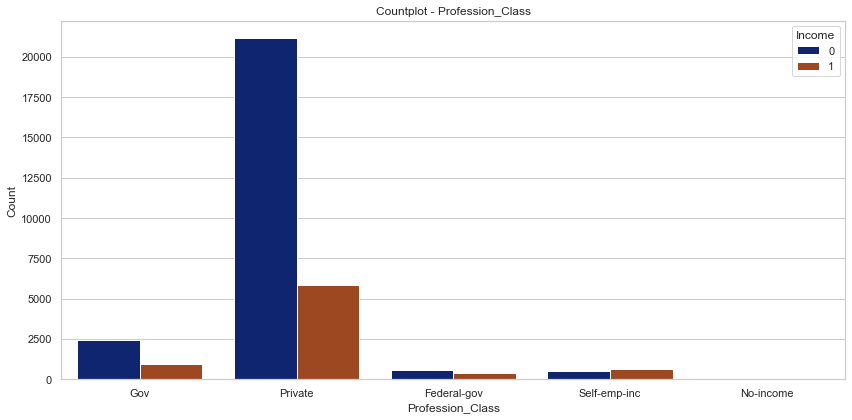

In [68]:
plt.figure(figsize=(12, 6))

# Countplot
sns.countplot(x='Profession_Class', data=df, hue='Income', palette='dark')
plt.title('Countplot - Profession_Class')
plt.xlabel('Profession_Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Education

- We combine all the columns relevant to schools in ‘School’ category, put ‘Doctorate’ and ‘Prof school’ in a single category ‘Doctorate’, ‘Assoc-acdm’ and ‘Assoc-voc’ in one category ‘Assoc’, and ‘HS-Grad’ and ‘Some-college’ in one category ‘College’.

- We now obtain 6 categories of education

In [69]:
# Combine columns relevant to schools into 'School' category
school_categories = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']
df['Education'] = df['Education'].replace(school_categories, ' School')

# Combine 'Doctorate' and 'Prof-school' into 'Doctorate'
df['Education'] = df['Education'].replace(['Doctorate', 'Prof-school'], 'Doctorate')

# Combine 'Assoc-acdm' and 'Assoc-voc' into 'Assoc'
df['Education'] = df['Education'].replace(['Assoc-acdm', 'Assoc-voc'], 'Assoc')

# Combine 'HS-Grad' and 'Some-college' into 'College'
df['Education'] = df['Education'].replace(['HS-grad', 'Some-college'], 'College')

In [70]:
df['Education'].value_counts()

College      17776
Bachelors     5353
 School       4248
Assoc         2449
Masters       1722
Doctorate      989
Name: Education, dtype: int64

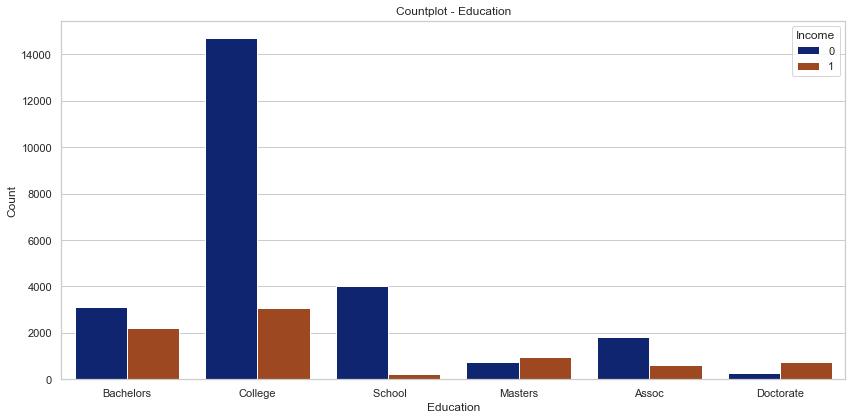

In [71]:
plt.figure(figsize=(12, 6))

# Countplot
sns.countplot(x='Education', data=df, hue='Income', palette='dark')
plt.title('Countplot - Education')
plt.xlabel('Education')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Marital_status

- We will combine ‘Divorced’, ‘Married-spouse-absent’, ‘Separated’, ‘Widowed’ and ‘Married-AF-Spouse’ to one category and name it as ‘No spouse’.

- We now obtain 3 categories.

In [72]:
# Combine specified marital status categories into 'No spouse'
no_spouse_categories = ['Divorced', 'Married-spouse-absent', 'Separated', 'Widowed', 'Married-AF-spouse']
df['Marital_status'] = df['Marital_status'].replace(no_spouse_categories, 'No spouse')

In [73]:
df['Marital_status'].value_counts()

Married-civ-spouse    14970
Never-married         10667
No spouse              6900
Name: Marital_status, dtype: int64

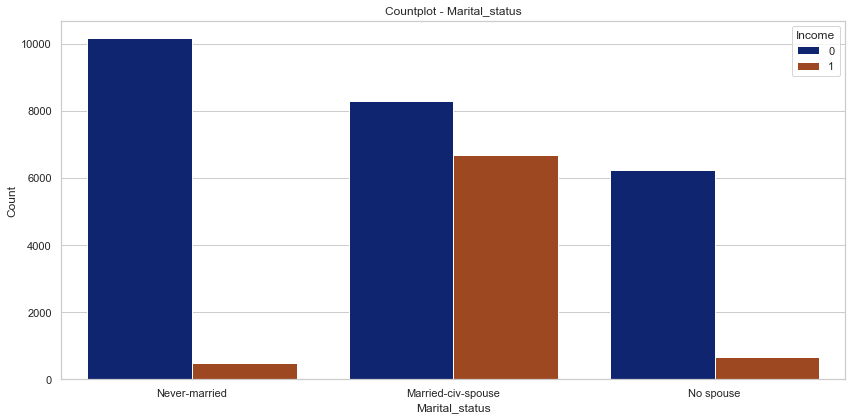

In [74]:
plt.figure(figsize=(12, 6))

# Countplot
sns.countplot(x='Marital_status', data=df, hue='Income', palette='dark')
plt.title('Countplot - Marital_status')
plt.xlabel('Marital_status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Relationship

- We wil combine ‘Not-in-family’, ‘Own-child’, ‘Unmarried’ and ‘Other-relative’ columns to a single category looking at the distributions, and name is as ‘Other’.

In [75]:
# Combine specified relationship categories into 'Other'
other_relationships = ['Not-in-family', 'Own-child', 'Unmarried', 'Other-relative']
df['Relationship'] = df['Relationship'].replace(other_relationships, 'Other')

In [76]:
df['Relationship'].value_counts()

Other      17782
Husband    13187
Wife        1568
Name: Relationship, dtype: int64

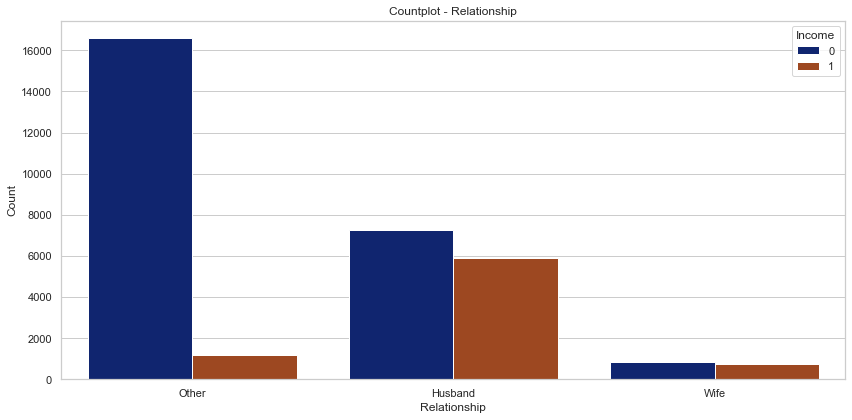

In [77]:
plt.figure(figsize=(12, 6))

# Countplot
sns.countplot(x='Relationship', data=df, hue='Income', palette='dark')
plt.title('Countplot - Relationship')
plt.xlabel('Relationship')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Race

- We will combine the categories ‘Amer-Indian-Eskimo’ and ‘Other’ to ‘Others’ category, since they have similar distributions.

In [78]:
# Combine specified race categories into 'Others'
others_race_categories = ['Amer-Indian-Eskimo', 'Other']
df['Race'] = df['Race'].replace(others_race_categories, 'Others')

In [79]:
df['Race'].value_counts()

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Others                  582
Name: Race, dtype: int64

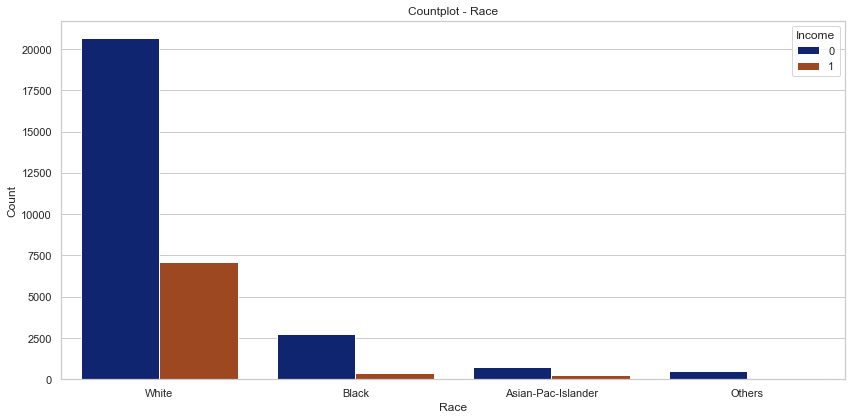

In [80]:
plt.figure(figsize=(12, 6))

# Countplot
sns.countplot(x='Race', data=df, hue='Income', palette='dark')
plt.title('Countplot - Race')
plt.xlabel('Race')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Encoding the data & Removing Outliers

In [81]:
df.columns

Index(['Age', 'Profession_Class', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Country', 'Income'],
      dtype='object')

In [82]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Fit and transform 'Income' column
df['Profession_Class'] = le.fit_transform(df['Profession_Class'])
df['Education'] = le.fit_transform(df['Education'])
df['Marital_status'] = le.fit_transform(df['Marital_status'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Race'] = le.fit_transform(df['Race'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Country'] = le.fit_transform(df['Country'])

In [83]:
df.head()

Age  Profession_Class  Education  Education_num  Marital_status  \
0   39                 1          2             13               1   
1   50                 3          2             13               0   
2   38                 3          3              9               2   
3   53                 3          0              7               0   
4   28                 3          2             13               0   

   Occupation  Relationship  Race  Gender  Capital_gain  Capital_loss  \
0           0             1     3       1          2174             0   
1           3             0     3       1             0             0   
2           5             1     3       1             0             0   
3           5             0     1       1             0             0   
4           9             2     1       0             0             0   

   Hours_per_week  Country  Income  
0              40       38       0  
1              13       38       0  
2              40       38       0  
3              40       38       0  
4              40        4       0

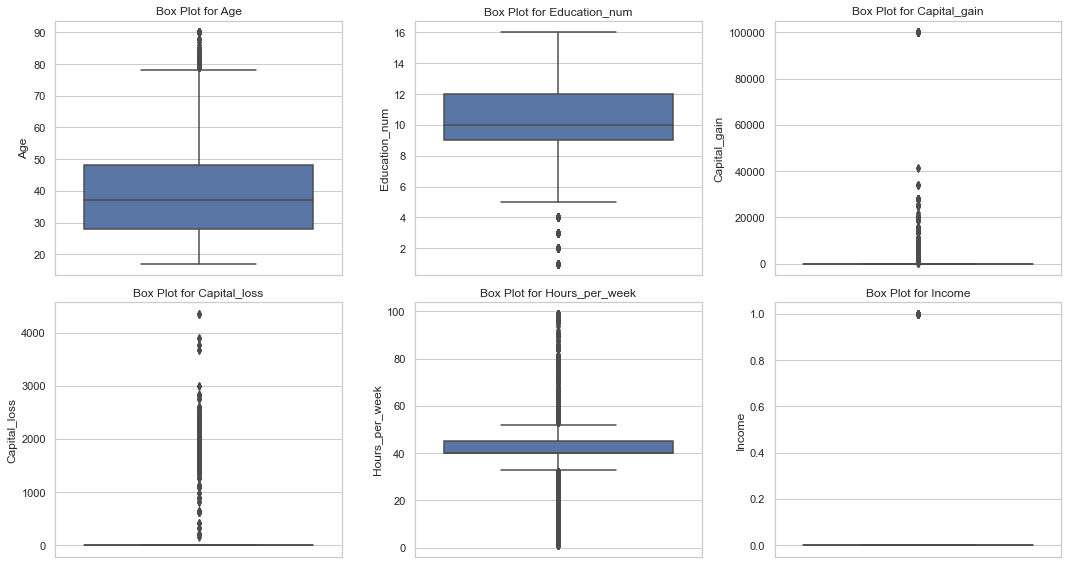

In [84]:
# Select numerical columns for box plots
numerical_columns = ["Age", "Education_num", "Capital_gain", "Capital_loss", "Hours_per_week", "Income"]

# Set up subplots
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=column, data=df)
    plt.title(f'Box Plot for {column}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

- - There are huge amount of outliers present in our data. It will make impact on model prediction so we have to handle these outliers.

In [85]:
df1=df[["Age", "Education_num", "Capital_gain", "Capital_loss", "Hours_per_week","Income"]]
def count_outliers(column):
    # Calculate IQR for the column
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Determine lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and count outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers.count()


# Print number of outliers for each column
for column in df1.columns:
    outliers_count = count_outliers(df1[column])
    print(f'Number of outliers in {column}: {outliers_count}')

Number of outliers in Age: 142
Number of outliers in Education_num: 1193
Number of outliers in Capital_gain: 2712
Number of outliers in Capital_loss: 1519
Number of outliers in Hours_per_week: 9002
Number of outliers in Income: 7839


In [86]:
from scipy.stats import zscore

# Calculate Z-scores for each column
z_scores = zscore(df1.iloc[:, :-1])  # Exclude the "Income" column from Z-score calculation

# Define a threshold for Z-scores (e.g., 3)
z_threshold = 3

# Identify outliers using Z-scores
outliers = (np.abs(z_scores) > z_threshold).any(axis=1)

# Create a DataFrame containing only the outliers with the "Income" column
outliers_df = df1[outliers]

# Display the outliers DataFrame
outliers_df

Age  Education_num  Capital_gain  Capital_loss  Hours_per_week  Income
10      37             10             0             0              80       1
23      43              7             0          2042              40       0
28      39              9             0             0              80       0
32      45             13             0          1408              40       0
52      47             15             0          1902              60       1
...    ...            ...           ...           ...             ...     ...
32476   35              8             0             0              84       0
32494   82              9             0             0               3       0
32518   57              9         99999             0              40       1
32525   81             11             0             0               1       0
32531   30             13             0             0              99       0

[2406 rows x 6 columns]

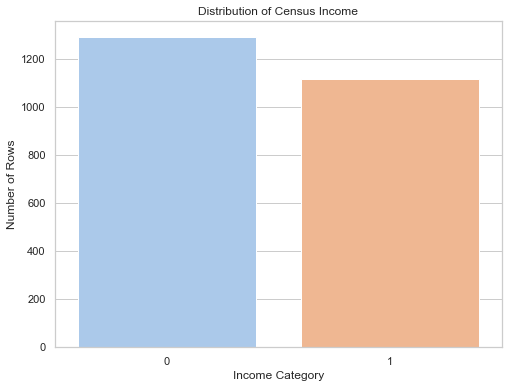

Number of rows with income <= 50K: 1291
Number of rows with income > 50K: 1115


In [87]:
# Count the number of rows for each income category
Income_distribution = outliers_df['Income'].value_counts()

# Plotting a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=Income_distribution.index, y=Income_distribution.values, palette='pastel')
plt.title('Distribution of Census Income')
plt.xlabel('Income Category')
plt.ylabel('Number of Rows')
plt.show()

# Print the counts
print("Number of rows with income <= 50K:", Income_distribution[0])
print("Number of rows with income > 50K:", Income_distribution[1])

- After calculating the number of rows containing outliers, we find that we would lose 2406 rows when we take threshold value of zscore as 3. 
- This data has 1291 rows with census income less than 50K dollars and 1115 rows with higher income than 50K dollars. 
- Since our dataset is already imbalanced, losing this number of rows with further increase the imbalance, and would be a significant loss if we consider the rows with income higher than 50K dollars.
- We can not afford to lose this much of data.

In [88]:
def threshold():
    for i in np.arange(3,5,0.2):
        data=df.copy()
        data=data[(z<i).all(axis=1)]
        loss=(df.shape[0]-data.shape[0])/df.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [89]:
z=np.abs(zscore(df))
threshold()

With threshold 3.0 data loss is 15.4%
With threshold 3.2 data loss is 14.58%
With threshold 3.4 data loss is 11.39%
With threshold 3.6 data loss is 8.22%
With threshold 3.8 data loss is 7.49%
With threshold 4.0 data loss is 7.08%
With threshold 4.2 data loss is 6.33%
With threshold 4.4 data loss is 5.74%
With threshold 4.6 data loss is 4.42%
With threshold 4.8 data loss is 3.09%


In [90]:
df=df[(z<4.2).all(axis=1)]
df.shape

(30477, 14)

- From above we choose threhold as 4.2 as data is precious and we cannot afford to lose more than 7% of data.

# Skewness treatment

In [91]:
# Selecting numeric columns for transformation
df_num=df[["Age", "Education_num", "Capital_gain", "Capital_loss", "Hours_per_week"]]

In [92]:
# Calculating skewness for each numeric column
df_num.skew()

Age               0.573877
Education_num    -0.301303
Capital_gain      5.507078
Capital_loss      7.772746
Hours_per_week   -0.076975
dtype: float64

In [93]:
# Initializing PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [94]:
# Applying PowerTransformer to columns with skewness greater than 0.5
for i in df_num:
    if np.abs(df[i].skew())>0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

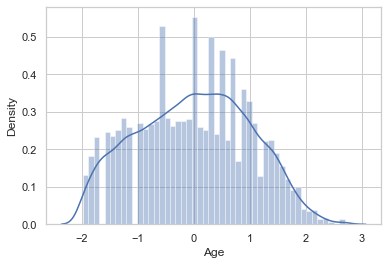

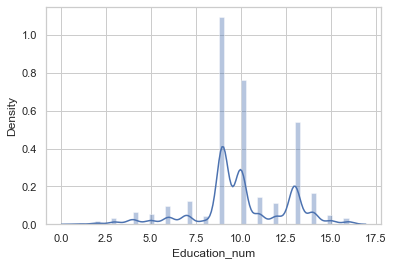

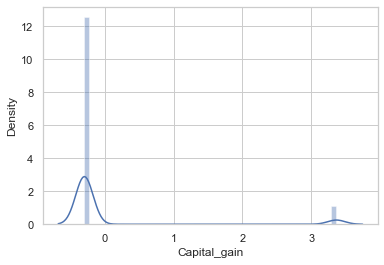

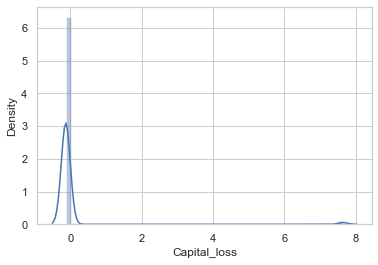

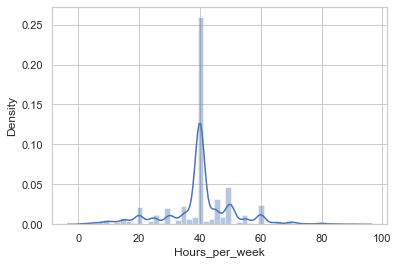

<Figure size 432x288 with 0 Axes>

In [95]:
# Plotting the distribution of transformed numeric columns
for i in df_num:
    sns.distplot(df[i])
    plt.figure()

- A lot of skewness has been resuced but we cannot remove skewness more than this.

## Scaling the data

In [96]:
# Initializing StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [97]:
# Separating the target variable 'Income' and the features
Scaled_x = df.drop('Income', axis='columns')
y = df['Income']

In [98]:
# Standardizing the features using StandardScaler
data = sc.fit_transform(Scaled_x)

# Creating a new DataFrame 'x' with standardized features
x = pd.DataFrame(data, columns=Scaled_x.columns)

# Handling Imbalanced Data

In [99]:
#Oversampling using Smote

# Creating an instance of SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [100]:
# Oversampling the minority class using SMOTE
x,y=sm.fit_resample(x,y)

1    23712
0    23712
Name: Income, dtype: int64

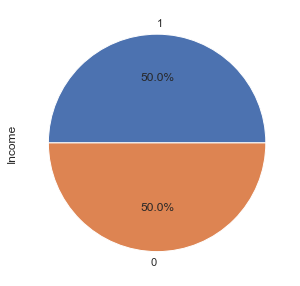

In [101]:
# Plotting a pie chart to visualize the class distribution after oversampling
plt.figure(figsize=(8,5))
y.value_counts().plot.pie(autopct='%1.1f%%')
y.value_counts()

- Data is balanced now, both the category of income have 50% data each.

# 5. Model Building

In [102]:
# import Classification Models and necessary metrics
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [103]:
#Function to find the best random state
def randomstate(x,y):
    maxx=0
    model=LogisticRegression()
    for i in range(1,201):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
        model.fit(x_train,y_train)
        p=model.predict(x_test)
        accu=accuracy_score(p,y_test)
        if accu>maxx:
            maxx=accu
            j=i
    return j

In [104]:
# To evaluate all models
def performance(p,y_test,m,x_test,s):
    print('------------------------------------',m,'------------------------------------')
    print('Accuracy',np.round(accuracy_score(p,y_test),4))
    print('----------------------------------------------------------')
    print('Mean of Cross Validation Score',np.round(s.mean(),4))
    print('----------------------------------------------------------')
    print('AUC_ROC Score',np.round(roc_auc_score(y_test,m.predict_proba(x_test)[:,1]),4))
    print('----------------------------------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(p,y_test))
    print('----------------------------------------------------------')
    print('Classification Report')
    print(classification_report(p,y_test))

In [105]:
models=[GaussianNB(),KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(verbosity=0)]

In [106]:
# Train model from the models list
def createmodel(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))
    for i in models:
        model=i
        model.fit(x_train,y_train)
        p=model.predict(x_test)
        score=cross_val_score(model,x,y,cv=10)
        performance(p,y_test,model,x_test,score) 

In [107]:
createmodel(x,y)

------------------------------------ GaussianNB() ------------------------------------
Accuracy 0.7838
----------------------------------------------------------
Mean of Cross Validation Score 0.773
----------------------------------------------------------
AUC_ROC Score 0.8575
----------------------------------------------------------
Confusion Matrix
[[4450 1143]
 [1420 4843]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      5593
           1       0.81      0.77      0.79      6263

    accuracy                           0.78     11856
   macro avg       0.78      0.78      0.78     11856
weighted avg       0.79      0.78      0.78     11856

------------------------------------ KNeighborsClassifier() ------------------------------------
Accuracy 0.851
----------------------------------------------------------
Mean of Cross Validation Score 0.8483
-

- Random Forest, Gradient Boost, Xtreme Gradient Boost give us the best performance, so we further try hyperparameter tuning on them.

## Hyperparameter Tuning using GridSearchCV

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

### Random Forest

In [110]:
params={'n_estimators':[100,300,500],
            'criterion':['gini','entropty'],
            'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
           'max_features':['int','float','auto','log2']}
g=GridSearchCV(RandomForestClassifier(),params,cv=10)

In [111]:
g.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropty'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['int', 'float', 'auto', 'log2'],
                         'n_estimators': [100, 300, 500]})

In [112]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 500}
RandomForestClassifier(max_features='log2', n_estimators=500)
0.883068968712338


In [113]:
m=RandomForestClassifier(max_features='log2', n_estimators=500)
m.fit(x_train,y_train)
p=m.predict(x_test)
score=cross_val_score(m,x,y,cv=10)
performance(p,y_test,m,x_test,score)

------------------------------------ RandomForestClassifier(max_features='log2', n_estimators=500) ------------------------------------
Accuracy 0.8908
----------------------------------------------------------
Mean of Cross Validation Score 0.8893
----------------------------------------------------------
AUC_ROC Score 0.9548
----------------------------------------------------------
Confusion Matrix
[[5215  640]
 [ 655 5346]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5855
           1       0.89      0.89      0.89      6001

    accuracy                           0.89     11856
   macro avg       0.89      0.89      0.89     11856
weighted avg       0.89      0.89      0.89     11856



### Gradient Boost

In [114]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
params={'n_estimators':[100,300,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10,None]}
gb=RandomizedSearchCV(GradientBoostingClassifier(),params,cv=10)

In [116]:
gb.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, None],
                                        'n_estimators': [100, 300, 500],
                                        'subsample': [0.5, 1]})

In [117]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 500}
RandomForestClassifier(max_features='log2', n_estimators=500)
0.883068968712338


In [118]:
m=GradientBoostingClassifier(max_depth=8, subsample=0.5)
m.fit(x_train,y_train)
p=m.predict(x_test)
score=cross_val_score(m,x,y,cv=10)
performance(p,y_test,m,x_test,score)

------------------------------------ GradientBoostingClassifier(max_depth=8, subsample=0.5) ------------------------------------
Accuracy 0.9028
----------------------------------------------------------
Mean of Cross Validation Score 0.8943
----------------------------------------------------------
AUC_ROC Score 0.9689
----------------------------------------------------------
Confusion Matrix
[[5239  521]
 [ 631 5465]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5760
           1       0.91      0.90      0.90      6096

    accuracy                           0.90     11856
   macro avg       0.90      0.90      0.90     11856
weighted avg       0.90      0.90      0.90     11856



### Xtreme Gradient Boost

In [119]:
params={
 "learning_rate"    : [0.01,0.05, 0.10, 0.15, ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }
gx=RandomizedSearchCV(XGBClassifier(),params,cv=10)

In [120]:
gx.fit(x_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None...
                                           min_child_weight=None, missing=nan,
                                           monotone_constra

In [121]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 500}
RandomForestClassifier(max_features='log2', n_estimators=500)
0.883068968712338


In [122]:
m=XGBClassifier(colsample_bytree=0.3, gamma= 0.1, learning_rate= 0.15, max_depth= 10, min_child_weight= 5)
m.fit(x_train,y_train)
p=m.predict(x_test)
score=cross_val_score(m,x,y,cv=10)
performance(p,y_test,m,x_test,score)

------------------------------------ XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) ------------------------------------
Accuracy 0.9021
----------------------------------------------------------
Mean of Cross Validation Score 0.896
----------------------------------------------------------
AUC_ROC Score 0.9705
-------------------------------------

### Final Model Selection Analysis
- XGboost and Gradient boost have the almost same accuracy (0.90), followed by Random Forest (0.89).
- XGboost has the highest AUC-ROC score (0.9705), followed by Gradient boosting (0.9689) and Random Forest (0.9548).
- Both accuracy and AUC-ROC scores are higher for Gradient boosting and XGboost compared to Random Forest.
- XGBoost consistently performs slightly better than Gradient boosting in terms of both accuracy and AUC-ROC score.
- Based on all the metrics, XGboost Classifier appears to be the best-performing model among the three for predicting income levels.

# 6. Result

## Final Model - XGboost Classifier

In [123]:
model=XGBClassifier(colsample_bytree=0.3, gamma= 0.1, learning_rate= 0.15, max_depth= 10, min_child_weight= 5)
model.fit(x_train,y_train)
p=model.predict(x_test)
score=cross_val_score(model,x,y,cv=10)

In [124]:
performance(p,y_test,model,x_test,score)

------------------------------------ XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) ------------------------------------
Accuracy 0.9021
----------------------------------------------------------
Mean of Cross Validation Score 0.896
----------------------------------------------------------
AUC_ROC Score 0.9705
-------------------------------------

In [125]:
fpred=pd.Series(model.predict_proba(x_test)[:,1])
fpr,tpr,threshold=roc_curve(y_test,fpred)

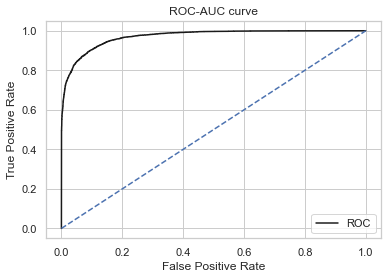

In [126]:
plt.plot(fpr,tpr,color='k',label='ROC')
plt.plot([0,1],[0,1],color='b',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend()

# 7. Insights

- People with education level as ‘Masters/Doctorate/Prof-school’ have higher ratios of >50K earning, than <=50K.
- If the relationship in the family is either ‘Husband/Wife’, the chances of earning more than 50K are high.
- A person has a high chance of earning >50K if his/her race is ‘White’.
- Males have a higher chance of earning more than 50K, than females.
- A person needs to be >30 to earn more than 50K, or work at least 60 hours per week to earn >50K.
- This income evaluation prediction ML model can be used for various statistical purposes –
- Predict whether People can be given loans or other benefits according to their income.
- Assigning scores to People to give them credibility by using the best features related to income.
   * These scores can be utilized to create different categories of Census- 
     1. Old age, High income, Highly educated. 
     2. Middle-aged, Middle-income, Average educated.
     3. Young, Low income, Low educated.


**_______________________End of the project_______________________**